# Date, Time  and Citations count  Findings. 
In this research we will be lookign for following research questions: 
1. What time of the day more citations are given?
2. What day of a week more citaions are given?
3. Comparing weekend vs Weekdays Citations. 
4. Holiday vs business day citations. 

In [71]:
#Import Necessary Modules
import numpy as np 
import seaborn as sns
import pandas as pd 
import requests
import json
import csv
import matplotlib.pyplot as plt
import time 
import calendar
import datetime
import holidays
import os

######  Data extraction
Our Dataset has 9 millions of rows, so took sample from actual csv file and saved it into LAPsampledata csv file.

Date_time_df=dataframe.sample(frac=0.005, replace=True,axis=0)

In [2]:
# Read CSV file
dataframe = pd.read_csv('../Data/LAPsampledata.csv',parse_dates=['Issue Date'],low_memory=False)
#Remove Unwanted Columns
Date_time_df=dataframe.drop(['Meter Id','Marked Time','Plate Expiry Date','VIN','Route','Agency'],axis=1)
#Check for null values
Date_time_df=Date_time_df[["Ticket number","Issue Date","Issue time"]]
Date_time_df.count()

Ticket number    47093
Issue Date       47090
Issue time       47068
dtype: int64

In [ ]:
# Display the datafrome
#Date_time_df.head()

In [3]:
Date_time_df["Issue time"].isna().any()
Date_time_df = Date_time_df.dropna(axis = 0, how ='any',inplace=False) 
Date_time_df['Issue time'] = Date_time_df.loc[:,['Issue time']].astype(int)

In [ ]:
# Date_time_df.info()

In [4]:
Date_time_df['Issue time'] = Date_time_df['Issue time'].apply(str)

for i,time in enumerate(Date_time_df['Issue time']):

    length = len(time)
    if(length==1):
        time="000"+ time
    elif(length==2):
        time = "00" + time
    elif(length==3):
        time = "0"+ time
    else:
        time = time
   
    Date_time_df.at[i,"Issue time"] = time

In [5]:
Date_time_df['Issue time']=pd.to_datetime(Date_time_df['Issue time'],format ='%H%M').dt.hour
Date_time_df = Date_time_df.dropna(axis = 0, how ='any',inplace=False)
Date_time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47068 entries, 0 to 47092
Data columns (total 3 columns):
Ticket number    47068 non-null float64
Issue Date       47068 non-null datetime64[ns]
Issue time       47068 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.4 MB


In [6]:
#Date_time_df = Date_time_df.dropna(axis = 0, how ='any',inplace=False)
Date_time_df.head()

,Ticket number,Issue Date,Issue time
0,4.297601e+09,2016-11-06,7
1,4.351911e+09,2019-04-02,18
2,4.304968e+09,2017-03-16,19
3,4.295311e+09,2016-10-27,13
4,4.278878e+09,2016-03-18,23


In [7]:
Date_time_df['Issue Date'] = pd.to_datetime(Date_time_df['Issue Date'], dayfirst=True)
Date_time_df['Year']= Date_time_df['Issue Date'].dt.year
Date_time_df['Month']= Date_time_df['Issue Date'].dt.month
Date_time_df['Date']= Date_time_df['Issue Date'].dt.day
Date_time_df['day_of_week'] =  Date_time_df['Issue Date'].dt.weekday_name
#Date_time_df.insert(loc=2,column="Weekday",value=day_of_week)

Date_time_df.head()

,Ticket number,Issue Date,Issue time,Year,Month,Date,day_of_week
0,4.297601e+09,2016-11-06,7,2016,11,6,Sunday
1,4.351911e+09,2019-04-02,18,2019,4,2,Tuesday
2,4.304968e+09,2017-03-16,19,2017,3,16,Thursday
3,4.295311e+09,2016-10-27,13,2016,10,27,Thursday
4,4.278878e+09,2016-03-18,23,2016,3,18,Friday


#### Yearly Citations analysis


   Issued Year  Citations Count
0         2010                2
1         2014              197
2         2015            10872
3         2016            11094
4         2017            11217
5         2018             9904
6         2019             3782


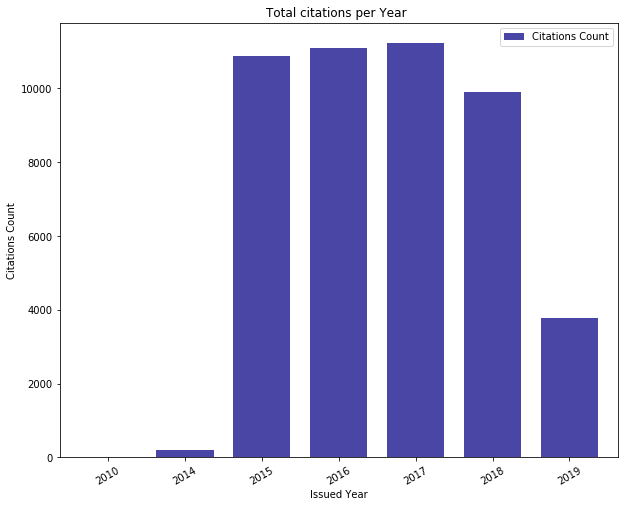

In [153]:

Yearlygrp=Date_time_df.groupby("Year")
yearlycount=Yearlygrp.count()
Yearly_Citations_DF=pd.DataFrame(data=yearlycount,index=None).reset_index()
Yearly_Citations_DF=Yearly_Citations_DF.rename(columns={"Year":"Issued Year","Ticket number":"Citations Count"})
Yearly_Citations_DF=Yearly_Citations_DF[["Issued Year","Citations Count"]]
print(Yearly_Citations_DF)

#ploting the no of citationas given per year
YrlyChart=Yearly_Citations_DF.plot(kind='bar',x='Issued Year',y="Citations Count", title = "Total citations per Year ",
                                 width = 0.75,figsize = (10,8),rot = 30,alpha = 0.75,colormap="plasma")

YrlyChart.set_xlabel("Issued Year")
YrlyChart.set_ylabel("Citations Count")
plt.savefig("../Images/Total_citations_Year.png")
plt.show()

#YearlyDF.head()

#### Monthly Citations Data analysis

    Issued Month  Citations Count
0              1             4516
1              2             4227
2              3             4732
3              4             4525
4              5             4424
5              6             3715
6              7             3503
7              8             3729
8              9             3374
9             10             3538
10            11             3267
11            12             3518


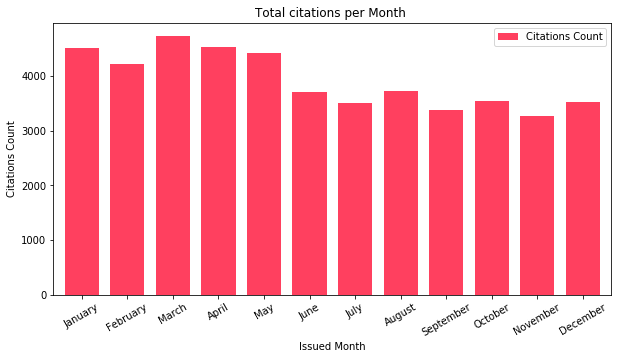

In [73]:
Monthlygrp=Date_time_df.groupby("Month")
Monthlycount=Monthlygrp.count()
Monthly_Citations_DF=pd.DataFrame(data=Monthlycount,index=None).reset_index()
Monthly_Citations_DF=Monthly_Citations_DF.rename(columns={"Month":"Issued Month","Ticket number":"Citations Count"})
Monthly_Citations_DF=Monthly_Citations_DF[["Issued Month","Citations Count"]]
print(Monthly_Citations_DF)
Monthly_Citations_DF['Month'] = Monthly_Citations_DF['Issued Month'].apply(lambda x: calendar.month_name[x])

#ploting the no of citationas given per Month
monthlyChart=Monthly_Citations_DF.plot(kind='bar',x='Month',y="Citations Count", title = "Total citations per Month ",
                                 width = 0.75,figsize = (10,5),rot = 30,alpha = 0.75,colormap="gist_rainbow")

monthlyChart.set_xlabel("Issued Month")
monthlyChart.set_ylabel("Citations Count")
plt.savefig("../Images/Total_citations_Month.png")
plt.show()

#YearlyDF.head()

#### Daily issued Citation count analysis 


     Weekday  Citations Count
3     Sunday             2414
2   Saturday             2629
0     Friday             7628
1     Monday             7672
6  Wednesday             8683
4   Thursday             8854
5    Tuesday             9188


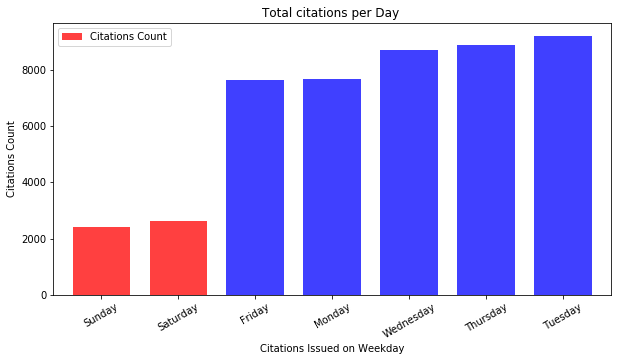

In [111]:
Dailygrp=Date_time_df.groupby("day_of_week")
Dailycount=Dailygrp.count()
Daily_Citations_DF=pd.DataFrame(data=Dailycount,index=None).reset_index()
Daily_Citations_DF=Daily_Citations_DF.rename(columns={"day_of_week":"Weekday","Ticket number":"Citations Count"})
Daily_Citations_DF=Daily_Citations_DF[["Weekday","Citations Count"]]
Daily_Citations_DF.sort_values(by="Citations Count",inplace=True)
print(Daily_Citations_DF)

#ploting the no of citationas given per Month
dailyChart=Daily_Citations_DF.plot(kind='bar',x='Weekday',y="Citations Count", title = "Total citations per Day ",
                                width = 0.75,figsize = (10,5),rot = 30,alpha = 0.75, color=['red', 'red', 'blue','blue','blue', 'blue', 'blue'])


dailyChart.set_xlabel("Citations Issued on Weekday")
dailyChart.set_ylabel("Citations Count")
plt.savefig("../Images/Total_citations_Week.png")
plt.show()


#### Hourly Citations analysis

,Issue time,Ticket number,Issue Date,Year,Month,Date,day_of_week,Holiday
0,0,480,480,480,480,480,480,5
1,1,953,953,953,953,953,953,12
2,2,852,852,852,852,852,852,4
3,3,564,564,564,564,564,564,1
4,4,518,518,518,518,518,518,1
5,5,307,307,307,307,307,307,3
6,6,635,635,635,635,635,635,6
7,7,1029,1029,1029,1029,1029,1029,9
8,8,5793,5793,5793,5793,5793,5793,37
9,9,3004,3004,3004,3004,3004,3004,16


    Hour  Citations Count
0      0              480
1      1              953
2      2              852
3      3              564
4      4              518
5      5              307
6      6              635
7      7             1029
8      8             5793
9      9             3004
10    10             5698
11    11             3996
12    12             5940
13    13             3011
14    14             2242
15    15             1633
16    16             2497
17    17             1743
18    18             1731
19    19             1516
20    20              869
21    21              735
22    22              801
23    23              521


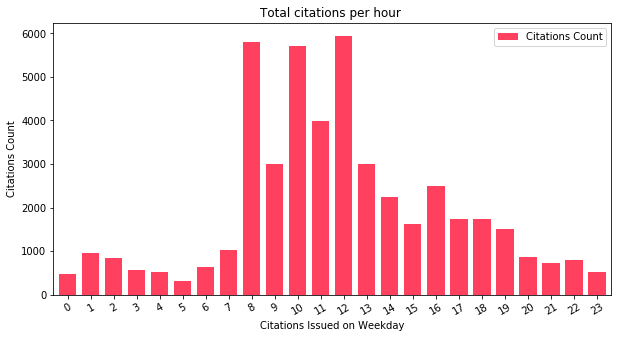

In [162]:
hourlygrp=Date_time_df.groupby("Issue time")
hourlycount=hourlygrp.count()
Hourly_Citations_DF=pd.DataFrame(data=hourlycount,index=None).reset_index()
Hourly_Citations_DF=Hourly_Citations_DF.rename(columns={"Issue time":"Hour","Ticket number":"Citations Count"})
Hourly_Citations_DF=Hourly_Citations_DF[["Hour","Citations Count"]]
Hourly_Citations_DF.sort_values(by="Hour",inplace=True)
print(Hourly_Citations_DF)

#ploting the no of citationas given per Month
hourlyChart=Hourly_Citations_DF.plot(kind='bar',x='Hour',y="Citations Count", title = "Total citations per hour ",
                                width = 0.75,figsize = (10,5),rot = 30,alpha = 0.75,colormap="gist_rainbow" )


hourlyChart.set_xlabel("Citations Issued on Weekday")
hourlyChart.set_ylabel("Citations Count")
plt.savefig("../Images/Total_citations_hour.png")
plt.show()



#### Citations Issued on Holiday

In [122]:
#Get the holidays from the Date column
us_holidays=holidays.US()
Date_time_df['Issue Date'] = pd.to_datetime(Date_time_df['Issue Date'], dayfirst=True)
Date_time_df["Holiday"]=Date_time_df['Issue Date'].map(us_holidays.get)


Holidaycount=Date_time_df.groupby(["Holiday"])['Ticket number'].count()
Holiday_Citations_DF=pd.DataFrame(data=Holidaycount,index=None).reset_index()
Holiday_Citations_DF=Holiday_Citations_DF.rename(columns={"Holidaycount":"Holiday","Ticket number":"Citations Count"})
Holiday_Citations_DF=Holiday_Citations_DF[["Holiday","Citations Count"]]

# Combining similar holidays together
Holiday_Citations_DF = Holiday_Citations_DF.replace(
    {"Christmas Day (Observed)": "Christmas Day", "Independence Day (Observed)": "Independence Day",
     "New Year's Day (Observed)":"New Year's Day","Veterans Day (Observed)":"Veterans Day"})
Holidaycount=Holiday_Citations_DF.groupby("Holiday").sum()
Holiday_Citations_DF=pd.DataFrame(data=Holidaycount,index=None).reset_index()
Holiday_Citations_DF=Holiday_Citations_DF.rename(columns={"Holidaycount":"Holiday","Ticket number":"Citations Count"})
Holiday_Citations_DF=Holiday_Citations_DF[["Holiday","Citations Count"]]
AvgHoliday_citations=Holiday_Citations_DF["Citations Count"].mean()
AvgDaily_citations=Daily_Citations_DF["Citations Count"].mean()
print(AvgDaily_citations)
print(AvgHoliday_citations)

6724.0
27.9


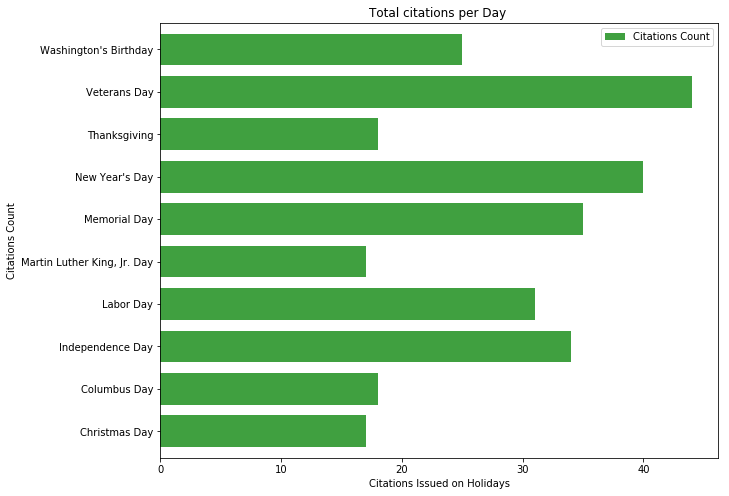

In [133]:
#ploting the no of citationas given per Holiday
HolidayChart=Holiday_Citations_DF.plot(kind='barh',x='Holiday',y="Citations Count", title = "Total citations per Holiday ",
                                width = 0.75,figsize = (10,8),rot =0,alpha = 0.75, color='green')
HolidayChart.set_xlabel("Citations Issued on Holidays")
HolidayChart.set_ylabel("Citations Count")
plt.savefig("../Images/Total_citations_holiday.png")
plt.show()

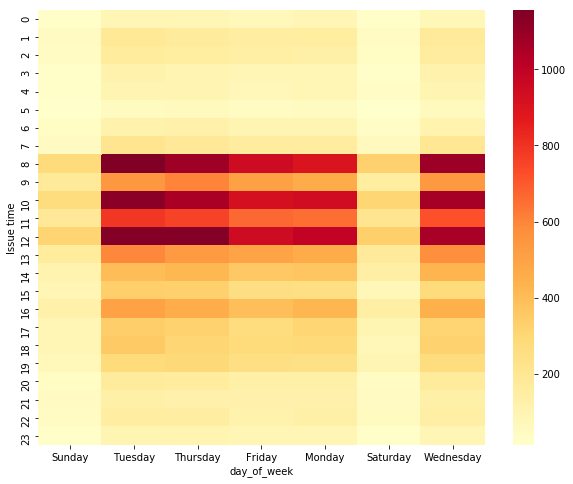

In [178]:
daysofWeek=Date_time_df['day_of_week'].unique()
timeOfdayDF=Date_time_df.groupby(['Issue time','day_of_week'])["Ticket number"].count().reset_index()
timeOfdayDF=timeOfdayDF.pivot('Issue time','day_of_week',"Ticket number")
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(timeOfdayDF[daysofWeek] , cmap="YlOrRd")
plt.title("Total Number of Citations by the Hour and Day of the Week.")